In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
from scipy.optimize import minimize, curve_fit
k=0+1j
from numpy import linalg as LA
from scipy.linalg import sqrtm

In [2]:
b=['Hs1','Hs2','Hs3','Vs1','Vs2','Vs3','Ds1','Ds2','Ds3','Rs1','Rs2','Rs3']
aHs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Hs1.txt')
aHs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Hs2.txt')
aHs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Hs3.txt')
aVs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Vs1.txt')
aVs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Vs2.txt')
aVs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Vs3.txt')
aDs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Ds1.txt')
aDs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Ds2.txt')
aDs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Ds3.txt')
aRs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Rs1.txt')
aRs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Rs2.txt')
aRs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Без элемента\Rs3.txt')
bHs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Hs1.txt')
bHs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Hs2.txt')
bHs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Hs3.txt')
bVs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Vs1.txt')
bVs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Vs2.txt')
bVs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Vs3.txt')
bDs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Ds1.txt')
bDs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Ds2.txt')
bDs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Ds3.txt')
bRs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Rs1.txt')
bRs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Rs2.txt')
bRs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\QWP 20 градусов\Rs3.txt')
cHs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Hs1.txt')
cHs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Hs2.txt')
cHs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Hs3.txt')
cVs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Vs1.txt')
cVs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Vs2.txt')
cVs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Vs3.txt')
cDs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Ds1.txt')
cDs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Ds2.txt')
cDs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Ds3.txt')
cRs1=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Rs1.txt')
cRs2=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Rs2.txt')
cRs3=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\Поляроид 60 градусов\Rs3.txt')
calib=np.loadtxt(r'C:\Users\Юзер\education\Томография процесса\калибровка.txt')
def medium(a):
    b=0
    for i in a:
        b+=i
    return b/len(a)
def error(a):
    return np.sqrt(medium((a-medium(a))*(a-medium(a)))/(len(a)-1))
adata=np.array([[aHs1,aHs2,aHs3],[aVs1,aVs2,aVs3],[aDs1,aDs2,aDs3],[aRs1,aRs2,aRs3]])
bdata=np.array([[bHs1,bHs2,bHs3],[bVs1,bVs2,bVs3],[bDs1,bDs2,bDs3],[bRs1,bRs2,bRs3]])
cdata=np.array([[cHs1,cHs2,cHs3],[cVs1,cVs2,cVs3],[cDs1,cDs2,cDs3],[cRs1,cRs2,cRs3]])

In [3]:
Rv=medium(calib[:10,-2]+calib[:10,-4])
erRvv=error(calib[:10,-2])
erRhv=error(calib[:10,-4])
Rh=medium(calib[10:20,-3]+calib[10:20,-5])
erRhh=error(calib[10:20,-5])
erRvh=error(calib[10:20,-3])
erRv=np.sqrt(erRvv**2+erRhv**2)
erRh=np.sqrt(erRhh**2+erRvh**2)
g=Rh/Rv
ergamma=np.sqrt((erRh/Rv)**2+((Rh*erRv)/(Rv**2))**2)
print('гамма:\t'+str(g)+'\tошибка гаммы:\t'+str(ergamma))
print('Rh:\t'+str(Rh)+'\t\t\t'+str(erRh))
print('Rv:\t'+str(Rv)+'\t\t\t'+str(erRv))

гамма:	0.543424317617866	ошибка гаммы:	0.019182845606733598
Rh:	87.6			2.809507667427397
Rv:	161.2			2.3772065772900577


In [252]:
def param(data):
    s=np.zeros((4,3,4))
    for i in range(4):
        for j in range(3):
            s[i][j][0]=medium(data[i][j][:,-3]+data[i][j][:,-5]-g*data[i][j][:,-4]-g*data[i][j][:,-2])
            s[i][j][1]=error(data[i][j][:,-3]+data[i][j][:,-5]-g*data[i][j][:,-4]-g*data[i][j][:,-2])
            s[i][j][2]=medium(data[i][j][:,-3]+data[i][j][:,-5]+g*data[i][j][:,-4]+g*data[i][j][:,-2])
            s[i][j][3]=error(data[i][j][:,-3]+data[i][j][:,-5]+g*data[i][j][:,-4]+g*data[i][j][:,-2])
    return s
def norm(s):
    a=np.zeros((4,3,2))
    for i in range(4):
        for j in range(3):
            a[i][j][0]=s[i][j][0]/s[i][j][2]
            a[i][j][1]=np.sqrt((s[i][j][1]/s[i][j][2])**2+((s[i][j][0]*s[i][j][3])/(s[i][j][2]**2))**2)
    return a
def density(a,i):
    k=0+1j
    return 0.5*np.array([[1+a[i-1][0][0],a[i-1][1][0]-k*a[i-1][2][0]],[a[i-1][1][0]+k*a[i-1][2][0],1-a[i-1][0][0]]])
def row(a):       
    return a.reshape(1,len(a)*len(a[0]))
def col(a):
    b=np.array([])
    for i in range(len(a[0])):
        for j in range(len(a)):
            b=np.append(b,a[j][i])
    return b.reshape(len(b),1)
def acol(a):
    s=int(np.sqrt(len(a)))
    return a.reshape(s,s).transpose()
def B():
    p=np.array([[[1,0],[0,0]],[[0,0],[0,1]],[[0.5,0.5],[0.5,0.5]],[[0.5,0.5j],[-0.5j,0.5]]])
    s=np.array([[[1,0],[0,1]],[[1,0],[0,-1]],[[0,1],[1,0]],[[0,-1j],[1j,0]]])
    b=np.array([])
    for i in range(4):
        for j in range(4):
            b=np.append(b,row(np.kron(p[j],s[i])))
    return b.reshape(16,16)
def M(s,c=0,data=param(adata)):
    b=np.zeros((4,4))
    for i in range(4):
        b[i][0]=1
    for i in range(4):
        for j in range(3):
            b[i][j+1]=s[i][j][0]
    if c!=0:
        k=param(adata)
        for i in range(4):
            b[i][0]=data[i][0][2]/k[i][0][2]
    return b
def hi(s):
    b=np.linalg.inv(B())
    m=M(s)
    return acol(b.dot(col(m)))
def hi1(m):
    b=np.linalg.inv(B())
    return acol(b.dot(col(m)))
def QWP(phi):
    k=0+1j
    return np.array([[np.cos(phi)**2+k*np.sin(phi)**1,(1-k)*np.cos(phi)*np.sin(phi)],[(1-k)*np.cos(phi)*np.sin(phi),k*np.cos(phi)**2+np.sin(phi)**2]])
def P(phi):
    return np.array([[np.cos(phi)**2,np.cos(phi)*np.sin(phi)],[np.cos(phi)*np.sin(phi),np.sin(phi)**2]])
def cc(a):
    return a.transpose().conj()
def Mt(proc,t,c=1):
    s=np.array([[[1,0],[0,1]],[[1,0],[0,-1]],[[0,1],[1,0]],[[0,-1j],[1j,0]]])
    p=np.array([density(t,1),density(t,2),density(t,3),density(t,4)])
    b=np.zeros((4,4))
    for i in range(4):
        for j in range(4):
            b[i][j]=np.trace(np.dot(proc, np.dot(p[i], np.dot(cc(proc),s[j]))))
    if c==1:        
        for i in range(4):
            norm=np.sqrt(abs(b[i][1])**2+abs(b[i][2])**2+abs(b[i][3])**2)
            b[i][0]=1
            for j in range(3):
                b[i][j+1]=b[i][j+1]/norm         
    return b
def r(grad):
    return (grad*np.pi)/180
def norm2(c,s=param(adata)):
    a=np.zeros((4,3,2))
    for i in range(4):
        for j in range(3):
            a[i][j][0]=c[i][j][0]/s[i][j][2]
    return a
def ahi(hi):
    return acol(B().dot(col(hi)))
def module(a):
    b=0
    for i in a:
        b+=abs(i)**2
    return np.sqrt(b)
def fidelity(a,b):
    return abs(cc(col(a)).dot(col(b))/(module(a.reshape(len(a)**2))*module(b.reshape(len(b)**2))))**2
    
    
    
    

In [253]:
print(param(adata))
print()
s=norm(param(adata))
print(s)
print()
print(density(s,1))
print(density(s,2))
print(density(s,3))
print(density(s,4))

[[[ 99.3407775    5.19249181 103.32588916   5.92055365]
  [  3.15632754   3.48897611  86.84367246   3.7876974 ]
  [  1.79404467   2.58586194  86.20595533   6.66063821]]

 [[-78.63688999   6.95588594  83.30355666   4.56627315]
  [  0.77998346   7.30949398  93.88668321   8.29248721]
  [  1.26550868   4.60844507  94.73449132   3.22013658]]

 [[  6.33002481   2.81514386  85.66997519   3.65503463]
  [ 84.67411084   3.62614381  88.6592225    3.99079203]
  [ 18.24317618   4.47625371  99.75682382   3.36779724]]

 [[ -3.48800662   3.9014474   92.15467328   2.40872102]
  [ -2.72704715   4.66288096  94.72704715   7.70842904]
  [ 89.45657568   3.6777796   90.54342432   3.91630913]]]

[[[ 0.96143162  0.07456748]
  [ 0.03634493  0.04020662]
  [ 0.02081115  0.03003939]]

 [[-0.94397998  0.09823331]
  [ 0.00830771  0.07785789]
  [ 0.01335848  0.04864802]]

 [[ 0.07388849  0.03301119]
  [ 0.95505136  0.05933705]
  [ 0.18287647  0.0452944 ]]

 [[-0.03784948  0.04234742]
  [-0.02878847  0.0492801 ]
  [ 0

In [254]:
p=np.array([[[1,0],[0,0]],[[0,0],[0,1]],[[0.5,0.5],[0.5,0.5]],[[0.5,0.5j],[-0.5j,0.5]]])

In [255]:
s0=np.array([[1,0],[0,1]])
s1=np.array([[1,0],[0,-1]])
s2=np.array([[0,1],[1,0]])
s3=np.array([[0,-1j],[1j,0]])

In [256]:
print(M(s))

[[ 1.          0.96143162  0.03634493  0.02081115]
 [ 1.         -0.94397998  0.00830771  0.01335848]
 [ 1.          0.07388849  0.95505136  0.18287647]
 [ 1.         -0.03784948 -0.02878847  0.98799638]]


In [257]:
hi(s)

array([[ 0.98071581+0.j        ,  0.01817247-0.01040557j,
         0.03258133-0.02328765j,  0.9518183 -0.10845323j],
       [ 0.01817247+0.01040557j,  0.01928419+0.j        ,
        -0.01909327+0.05733843j, -0.03258133+0.02328765j],
       [ 0.03258133+0.02328765j, -0.01909327-0.05733843j,
         0.02801001+0.j        ,  0.00415386-0.00667924j],
       [ 0.9518183 +0.10845323j, -0.03258133-0.02328765j,
         0.00415386+0.00667924j,  0.97198999+0.j        ]])

In [258]:
#Пластинка

In [259]:
MQT=Mt(QWP(r(50)),s,c=2)
print(MQT)#мусор

[[ 1.23641506  0.2796854  -0.2937656  -1.1285119 ]
 [ 1.00723708 -0.00949257  0.16888337  0.92336795]
 [ 1.06204484  0.08104762  0.94055854 -0.42027987]
 [ 1.20637231  1.18314062  0.16698401  0.03355328]]


<ipython-input-252-6e42abedd97b>:71: ComplexWarning: Casting complex values to real discards the imaginary part
  b[i][j]=np.trace(np.dot(proc, np.dot(p[i], np.dot(cc(proc),s[j]))))


In [260]:
sq=param(bdata)
#print(sq)
sq=norm2(param(bdata))
#print(sq)
MQexp=M(sq,c=1,data=param(bdata))
print(MQexp)


[[ 0.85261886  0.10228865 -0.03941178 -0.95220825]
 [ 1.07337609  0.04702425  0.16374032  0.87391517]
 [ 1.09463674 -0.10634806  0.97319688 -0.14523324]
 [ 1.0045326   0.98487636  0.11914429 -0.02564243]]


In [261]:
print(hi1(MQT))#мусор

[[ 0.75805023+0.j         -0.1468828 +0.56425595j -0.05691501+0.56629522j
   0.56956246+0.27356651j]
 [-0.1468828 -0.56425595j  0.47836483+0.j          0.4334372 -0.04414138j
  -0.00286622-0.48174898j]
 [-0.05691501-0.56629522j  0.4334372 +0.04414138j  0.49887225+0.j
   0.08444168-0.46168397j]
 [ 0.56956246-0.27356651j -0.00286622+0.48174898j  0.08444168+0.46168397j
   0.50836482+0.j        ]]


In [262]:
print(hi1(MQexp))

[[ 0.47745375+0.j         -0.01970589+0.47610412j -0.02468262+0.47587752j
   0.46226836+0.08153336j]
 [-0.01970589-0.47610412j  0.3751651 +0.j          0.44876425-0.02455334j
   0.15632188-0.43434239j]
 [-0.02468262-0.47587752j  0.44876425+0.02455334j  0.56020017+0.j
   0.08187016-0.43695758j]
 [ 0.46226836-0.08153336j  0.15632188+0.43434239j  0.08187016+0.43695758j
   0.51317592+0.j        ]]


In [263]:
hiteor=col(QWP(r(50))).dot(cc(col(QWP(r(50)))))
print(col(QWP(r(50))).dot(cc(col(QWP(r(50))))))#hi teor

[[ 0.75753842-1.39076465e-17j -0.17375383+5.80652674e-01j
  -0.17375383+5.80652674e-01j  0.55897269+2.78818999e-01j]
 [-0.17375383-5.80652674e-01j  0.48492316-2.20196240e-18j
   0.48492316-2.20196240e-18j  0.08550504-4.92403877e-01j]
 [-0.17375383-5.80652674e-01j  0.48492316-2.20196240e-18j
   0.48492316-2.20196240e-18j  0.08550504-4.92403877e-01j]
 [ 0.55897269-2.78818999e-01j  0.08550504+4.92403877e-01j
   0.08550504+4.92403877e-01j  0.51507684-1.53775937e-18j]]


In [264]:
print(np.real(ahi(hiteor)))#Mтеор

[[ 1.24246158  0.27261527 -0.34750767 -1.16130535]
 [ 1.         -0.03015369  0.17101007  0.98480775]
 [ 1.03298199 -0.13802808  0.95564705 -0.3670678 ]
 [ 1.20947959  1.19428734  0.1905702  -0.01419926]]


In [265]:
values,vectors=LA.eig(hi1(MQexp))#мусор
print(np.real(values))
vectors=vectors.transpose()
vectors

[ 1.86988413 -0.0927358   0.02904953  0.11979709]


array([[-0.01084229+0.50717698j,  0.47113156+0.00780033j,
         0.51664779+0.j        ,  0.10974946+0.49158752j],
       [ 0.19786568-0.42892213j,  0.76756788+0.j        ,
        -0.07899126-0.14221348j, -0.38315395-0.12018024j],
       [ 0.70653094+0.j        , -0.2275364 -0.19018058j,
         0.08167826+0.4753934j , -0.35652203+0.23042219j],
       [-0.1415902 +0.01718106j, -0.10717457-0.29897475j,
         0.6884334 +0.j        , -0.26797068-0.57709263j]])

In [266]:
Eexp=np.sqrt(np.real(values[0]))*acol(vectors[0].transpose())
print(Eexp)
print()
print(QWP(r(50)))


[[-0.01482615+0.6935326j   0.70648333+0.j        ]
 [ 0.64424276+0.01066646j  0.15007548+0.67221499j]]

[[0.41317591+0.76604444j 0.49240388-0.49240388j]
 [0.49240388-0.49240388j 0.58682409+0.41317591j]]


In [267]:
print(fidelity(Eexp,QWP(r(50))))

[[0.97705036]]


In [268]:
values,vectors=LA.eig(Eexp)
print(values)
vectors=vectors.transpose()
vectors

[-0.61197034+0.67862272j  0.74721967+0.68712487j]


array([[ 0.76363316+0.j        , -0.6454492 -0.01611599j],
       [ 0.67982966+0.0057164j ,  0.73334777+0.j        ]])

In [269]:
values,vectors=LA.eig(QWP(r(50)))
print(values)
vectors=vectors.transpose()
vectors

[0.00375941+1.10907659j 0.99624059+0.07014376j]


array([[ 0.79346937+0.j        , -0.60625534-0.05348654j],
       [ 0.60625534+0.05348654j,  0.79346937+0.j        ]])

[ 0.          1.06666667  2.13333333  3.2         4.26666667  5.33333333
  6.4         7.46666667  8.53333333  9.6        10.66666667 11.73333333
 12.8        13.86666667 14.93333333 16.        ]


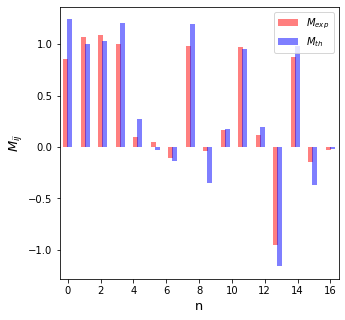

In [270]:
x = np.linspace(0, 16, 16)
print(x)

fig, ax = plt.subplots()

ax.bar(x - 0.125, np.real(col(MQexp).reshape(-1)), width=0.3, color='red', alpha=0.5, label=r'$M_{exp}$')
ax.bar(x + 0.125, np.real(col(np.real(ahi(hiteor))).reshape(-1)), width=0.3, color='blue', alpha=0.5, label=r'$M_{th}$')

plt.xlabel('n', fontsize=13)
plt.ylabel(r'$M_{ij}$', fontsize=13)

fig.set_figwidth(5)
fig.set_figheight(5)
plt.xlim(-0.5, 16.5)
plt.legend(loc='upper right')
plt.show()

In [271]:
#Поляризатор

In [272]:
sq=param(cdata)
#print(sq)
sq=norm2(param(cdata))
#print(sq)
MQexp=M(sq,c=1,data=param(cdata))
print(MQexp)

[[0.32196348 0.13613404 0.35671562 0.09188951]
 [0.11525706 0.08481443 0.1681805  0.03182461]
 [0.44701907 0.21443399 0.47421844 0.09997015]
 [0.27041242 0.15640623 0.18910282 0.10668969]]


In [273]:
print(hi1(MQexp))

[[0.22904876+0.j         0.17835781-0.04594475j 0.16618427+0.04886707j
  0.1283015 -0.05572917j]
 [0.17835781+0.04594475j 0.09291472+0.j         0.08346887-0.01761608j
  0.06222452+0.00293508j]
 [0.16618427-0.04886707j 0.08346887+0.01761608j 0.10003574+0.j
  0.08409025-0.01591231j]
 [0.1283015 +0.05572917j 0.06222452-0.00293508j 0.08409025+0.01591231j
  0.01522132+0.j        ]]


In [274]:
hiteor=col(P(r(30))).dot(cc(col(P(r(30)))))
print(col(P(r(30))).dot(cc(col(P(r(30))))))

[[0.5625     0.32475953 0.32475953 0.1875    ]
 [0.32475953 0.1875     0.1875     0.10825318]
 [0.32475953 0.1875     0.1875     0.10825318]
 [0.1875     0.10825318 0.10825318 0.0625    ]]


In [275]:
print(np.real(ahi(hiteor)))

[[0.75       0.375      0.64951905 0.        ]
 [0.25       0.125      0.21650635 0.        ]
 [0.9330127  0.46650635 0.8080127  0.        ]
 [0.5        0.25       0.4330127  0.        ]]


In [276]:
values,vectors=LA.eig(hi1(MQexp))
print(np.real(values))
vectors=vectors.transpose()
vectors

[ 0.51204412 -0.10156249  0.04820853 -0.02146961]


array([[ 0.7106605 +0.j        ,  0.4339886 +0.06615061j,
         0.43939194-0.04573316j,  0.31410394+0.09176903j],
       [ 0.56433735+0.j        , -0.41895933-0.18191055j,
        -0.18813509+0.42685275j, -0.19856628-0.46462709j],
       [-0.18097569+0.24839292j, -0.33621706-0.54104407j,
         0.7068582 +0.j        , -0.00397887+0.01066833j],
       [-0.14344876-0.24790365j, -0.38283626+0.2152334j ,
         0.03752983+0.29357811j,  0.79842383+0.j        ]])

In [277]:
Eexp=np.sqrt(np.real(values[0]))*acol(vectors[0].transpose())
print(Eexp)

[[0.50852917+0.j         0.31441683-0.03272539j]
 [0.31055034+0.04733557j 0.22476417+0.0656674j ]]


In [278]:
print(fidelity(Eexp,P(r(30))))

[[0.9805286]]


In [279]:
print(P(r(30)))

[[0.75      0.4330127]
 [0.4330127 0.25     ]]


In [280]:
values,vectors=LA.eig(Eexp)
print(values)
vectors=vectors.transpose()
vectors

[0.71057774+0.02615091j 0.0227156 +0.03951649j]


array([[ 0.84055273+0.j        ,  0.52716329+0.12477972j],
       [-0.54399493+0.01226766j,  0.83899882+0.j        ]])

In [281]:
values,vectors=LA.eig(P(r(30)))
print(values)
vectors=vectors.transpose()
vectors

[1.00000000e+00 2.77555756e-17]


array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

[ 0.          1.06666667  2.13333333  3.2         4.26666667  5.33333333
  6.4         7.46666667  8.53333333  9.6        10.66666667 11.73333333
 12.8        13.86666667 14.93333333 16.        ]


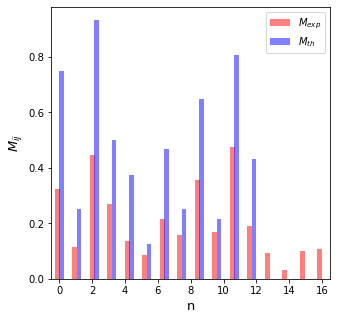

In [282]:
x = np.linspace(0, 16, 16)
print(x)

fig, ax = plt.subplots()

ax.bar(x - 0.125, np.real(col(MQexp).reshape(-1)), width=0.3, color='red', alpha=0.5, label=r'$M_{exp}$')
ax.bar(x + 0.125, np.real(col(np.real(ahi(hiteor))).reshape(-1)), width=0.3, color='blue', alpha=0.5, label=r'$M_{th}$')

plt.xlabel('n', fontsize=13)
plt.ylabel(r'$M_{ij}$', fontsize=13)

fig.set_figwidth(5)
fig.set_figheight(5)
plt.xlim(-0.5, 16.5)
plt.legend(loc='upper right')
plt.show()

In [283]:
A=0.024
sA=0.008
B=0.0035
sB=0.0003
D=0.1
B/(D+A)
np.sqrt((sB/(D+A))**2+(B/(D+A)**2)*(sB**2))

0.00242358501150929